<a href="https://colab.research.google.com/github/Hiteshshekhawat/Hotel-Booking-EDA/blob/main/Hotel_booking_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

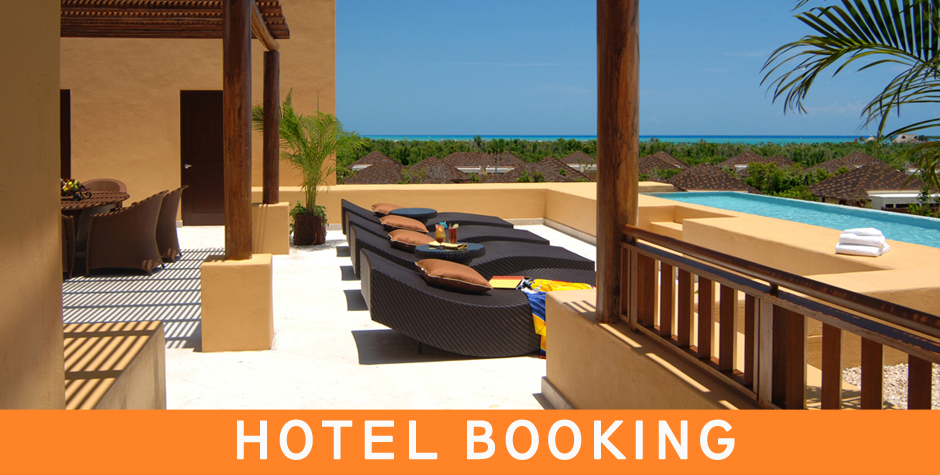

# Business context

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.Explore and analyse the data to discover important factors that govern the bookings.

# Importing Of Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing of dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
eda_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings (1).csv')


In [4]:
eda_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
drive.flush_and_unmount()

# Data Dictonary

hotel: Type of hotel(Resort hotel or City Hotel)

is_canceled: Value indicating if the booking was canceled (1) or not (0)

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year: Year of arrival date

arrival_date_month: Month of arrival date

arrival_date_week_number: Week number of year for arrival date

arrival_date_day_of_month: Day of arrival date

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults: Number of adults

children: Number of children

babies: Number of babies

meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent: ID of the travel agency that made the booking

company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces: Number of car parking spaces required by the customer

total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Reading and Understanding of Data

In [6]:
eda_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
eda_df.shape

(119390, 32)

In dataset (hotel booking) there are 119390 and 32, rows and columns respectively.

In [8]:
eda_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
eda_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
eda_df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

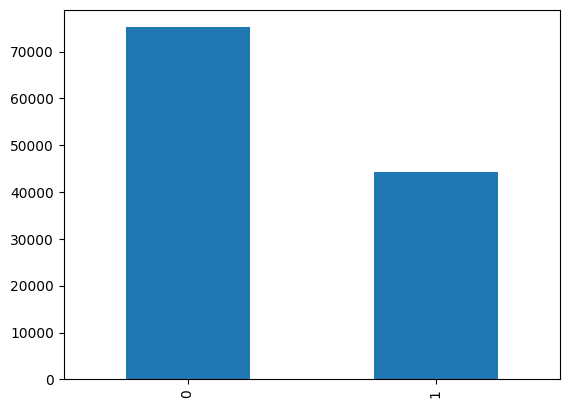

In [12]:
eda_df.is_canceled.value_counts().plot.bar()

plt.show()

In [13]:
eda_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


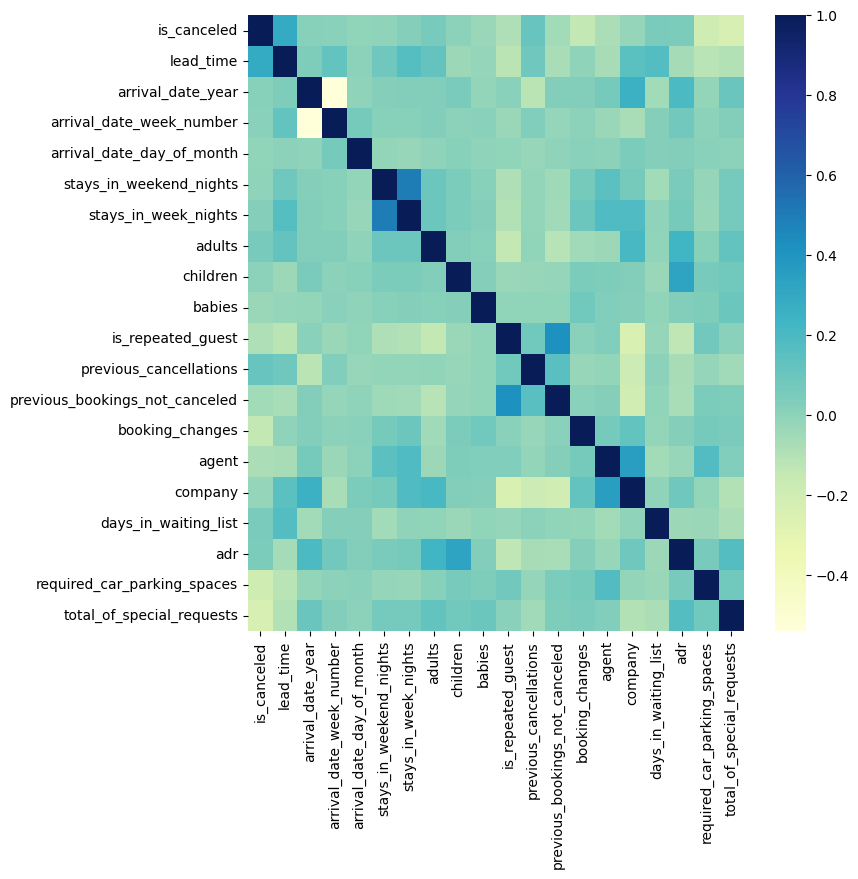

In [14]:
# heatmap for the corelation matrix

plt.figure(figsize = (8,8))
sns.heatmap(eda_df.corr(),cmap='YlGnBu')
plt.show()

In [15]:
eda_df.isnull().sum()[eda_df.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [16]:
eda_df.drop('company', axis=1, inplace=True)
null_columns = ['agent', 'children']
for col in null_columns:
    eda_df[col].fillna(0, inplace=True)
    
# Replacing NA values with other    
eda_df['country'].fillna('others', inplace=True)

In [17]:
#eliminating of all null values

eda_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [18]:
#finding and removing duplicated values

(eda_df[eda_df.duplicated()].shape) #There are 31994 Duplicate rows 
eda_df.drop_duplicates(inplace = True) 


In [19]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

len(eda_df[eda_df['adults']+eda_df['babies']+eda_df['children']==0])
eda_df.drop(eda_df[eda_df['adults']+eda_df['babies']+eda_df['children'] == 0].index, inplace=True)

# Lets add some new columns

eda_df['total_people'] = eda_df['adults']  + eda_df['babies'] + eda_df['children']
eda_df['total_stay'] = eda_df['stays_in_week_nights'] + eda_df['stays_in_weekend_nights']

# Exploratory Data Analysis(EDA)

**1.Which type of hotels is mostly preffered by the guests:**



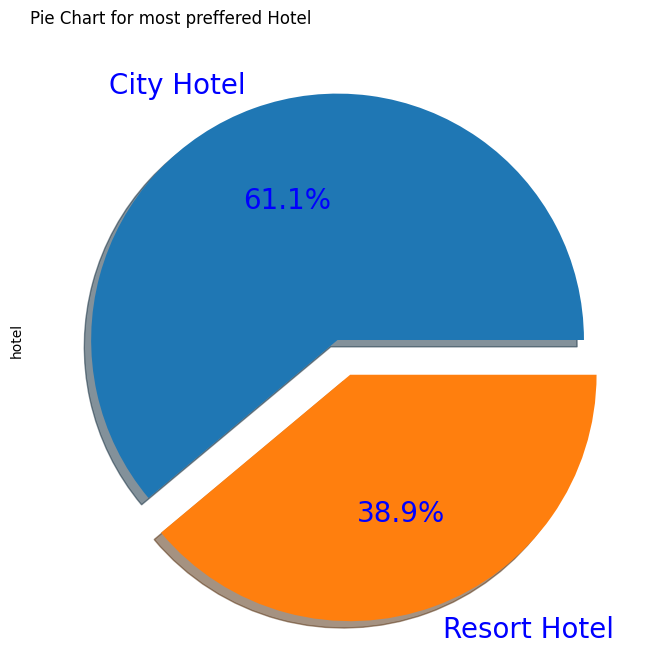

In [20]:
eda_df['hotel'].value_counts().plot.pie(explode=[0,0.15],  autopct='%1.1f%%', shadow=True, figsize=(10, 8),
                                     fontsize=20, textprops={'color':'b'})
plt.title('Pie Chart for most preffered Hotel', loc = 'left')
plt.show()

Observation from above graph:

City hotel is more preffered by guest than resort hotel.Therefore from above represention city hotel have maximum booking.















**2.highest booking made by any agent**

In [21]:
hightest_bookings = eda_df.groupby(['agent']).size().reset_index().rename(columns={0:'Most_Bookings'}).sort_values(by="Most_Bookings", ascending=False)

# As agent 0 was NAN and we replaced it by 0 so it means 0 bookings
hightest_bookings.drop(hightest_bookings[hightest_bookings['agent'] == 0].index, inplace=True)

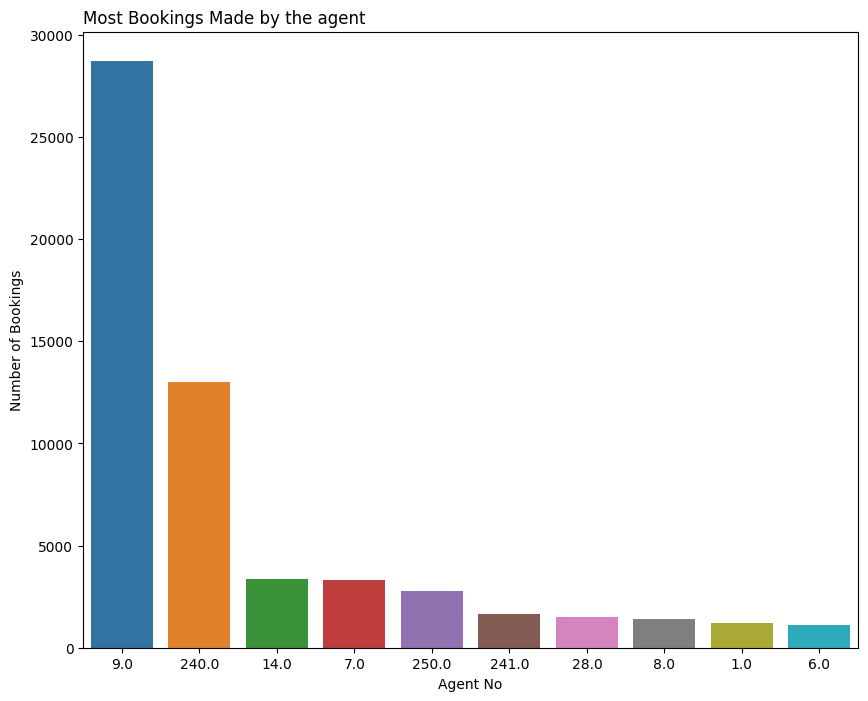

In [22]:
top_ten_highest_booking = hightest_bookings[:10]
top_ten_highest_booking = top_ten_highest_booking.sort_values(by='Most_Bookings', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_ten_highest_booking['agent'], y=top_ten_highest_booking['Most_Bookings'], order=top_ten_highest_booking['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent", loc = 'left')
plt.show()

Observation made from above graph:

Agent no 9 had made highest number of booking

**3.Let's find out the percentage of cancellations of bookings?**



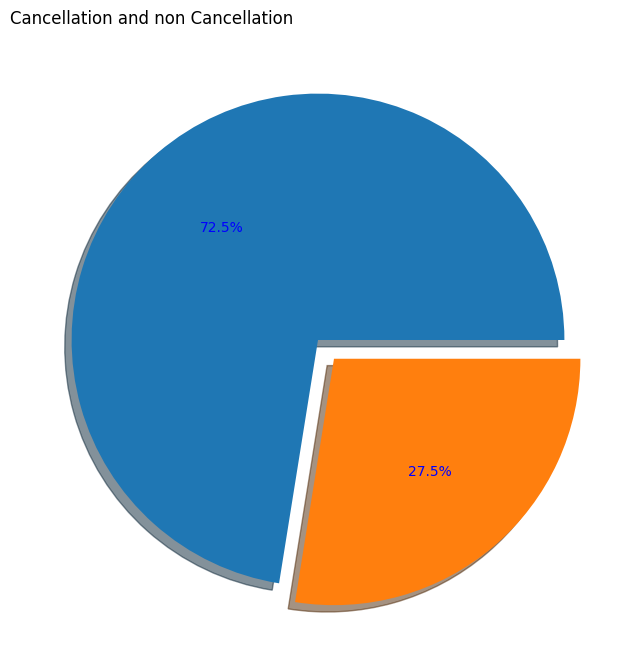

In [23]:
plt.figure(figsize = (10,8))
plt.pie(eda_df['is_canceled'].value_counts(),explode=[0, 0.1], autopct='%1.1f%%', shadow=True,textprops={'color':'b'})
plt.title("Cancellation and non Cancellation",loc = 'left')
plt.show()

Observation from above representation:

27.5% of total boooking is cancelled.

**4. The percentage of repeated guests?**

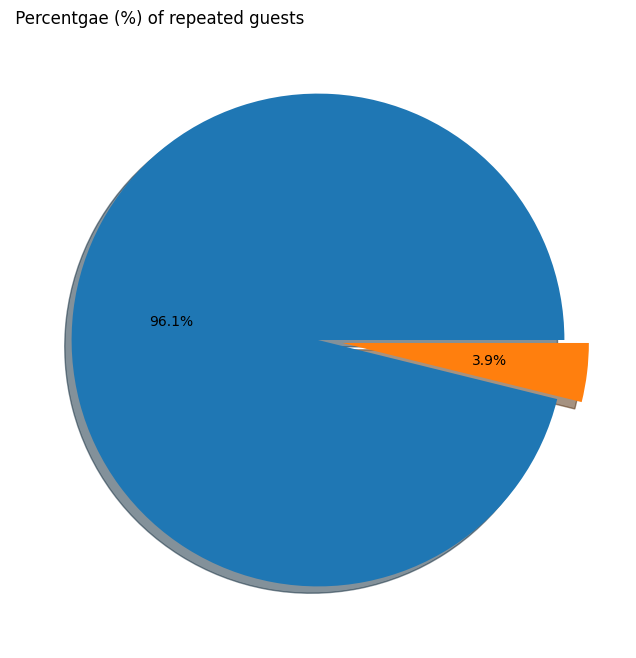

In [24]:
plt.figure(figsize = (10,8))
plt.pie(eda_df['is_repeated_guest'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title(" Percentgae (%) of repeated guests",loc = 'left')
plt.show()

Observation form above representation:

Repeated guest are very few i.e only 3.9% .

In order to retained the guests management should take feedbacks from guests and try to imporve the services.

**5. Most preferred guest type of food by guests?**

Text(0.5, 1.0, 'Preferred Meal Type')

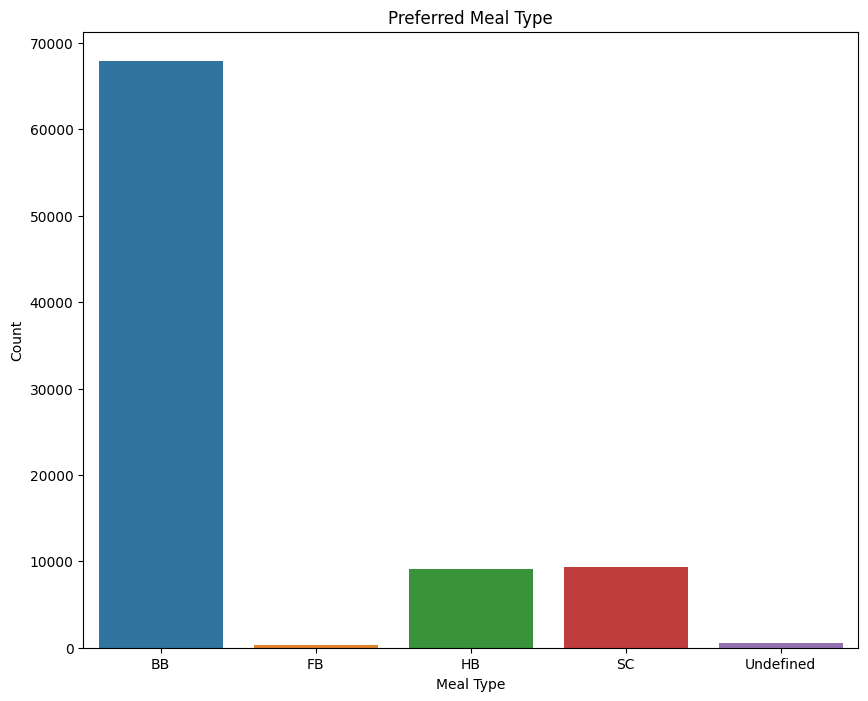

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=eda_df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Observation from above representation of graph:

So the moost preferred food by the customers is BB(Bed and Breakfast).
HB(Half Board) and SC(Self catering) are equally preferred.

**6.Most preferred room by guests?**

Text(0.5, 1.0, 'Most preferred Room Type by Customers')

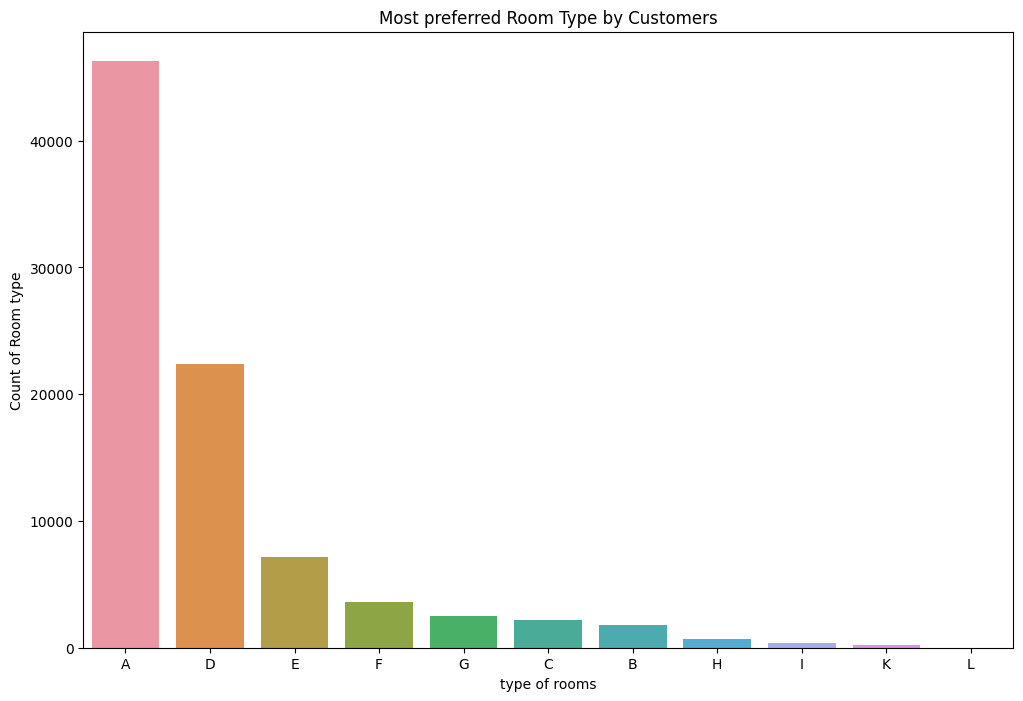

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x = eda_df['assigned_room_type'], order=eda_df['assigned_room_type'].value_counts().index)
plt.xlabel('type of rooms')
plt.ylabel('Count of Room type')
plt.title('Most preferred Room Type by Customers')

Observation from above graph:

The most preffered room type by guests is TYPE A.

**7. Which month have the highest number of booking?**


Text(0, 0.5, 'Number of bookings')

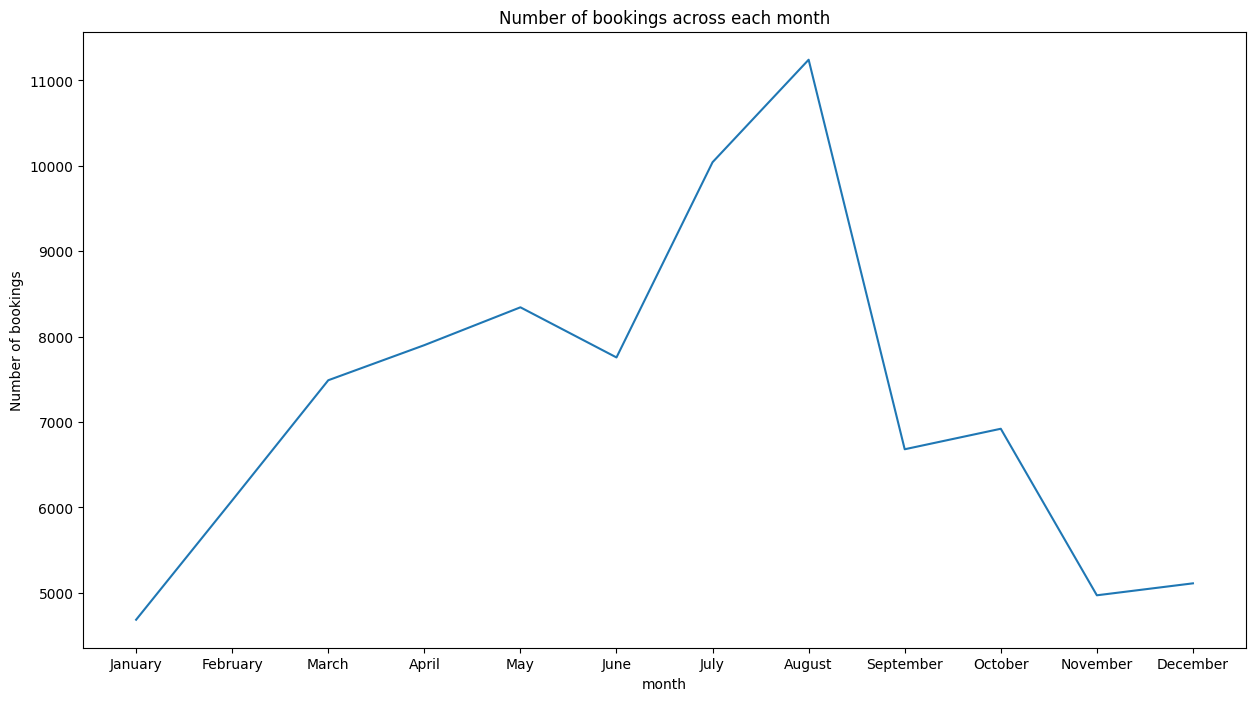

In [27]:
# bookings_by_month = df.arrival_date_month.size().reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
booking_by_month = eda_df['arrival_date_month'].value_counts().reset_index().rename(columns={'index':'month', 'arrival_date_month':'count'})

# creating df which will map the order of above months list without changing its values.
booking_by_month['month'] = pd.Categorical(booking_by_month['month'],categories=months, ordered=True)
booking_by_month = booking_by_month.sort_values('month')


plt.figure(figsize=(15, 8))

sns.lineplot(x=booking_by_month['month'], y=booking_by_month['count'])
plt.title('Number of bookings across each month')
plt.ylabel('Number of bookings')

Observation from above graph:

Maximum booking is done in month of AUGUST.
Where as, Minimum no of booking are in month of JANUARY.

**8. Which is the most busiest month?**


In [28]:
data_resort = eda_df[(eda_df['hotel'] == 'Resort Hotel') & (eda_df['is_canceled'] == 0)]
data_city = eda_df[(eda_df['hotel'] == 'City Hotel') & (eda_df['is_canceled'] == 0)]

In [29]:
# RESORT GUEST
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month','no of guests']
resort_guests


,month,no of guests
0,August,3153
1,July,3012
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2052
7,June,1926
8,September,1875
9,November,1742


In [30]:
#FOR CITY GUESTS:
city_guests  = data_city["arrival_date_month"].value_counts().reset_index()
city_guests.columns = ['month','no of guests']
city_guests

,month,no of guests
0,August,4467
1,July,3834
2,May,3655
3,June,3477
4,March,3469
5,April,3325
6,September,3165
7,October,3070
8,February,2618
9,November,2177


**9 . Getting the number of all national and international guests?**

In [31]:
eda_df['guest_location'] = eda_df['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
eda_df['guest_location'].value_counts()

International    59872
Local            27351
Name: guest_location, dtype: int64

**10. Find out the cancellation rate of hotel booking?**

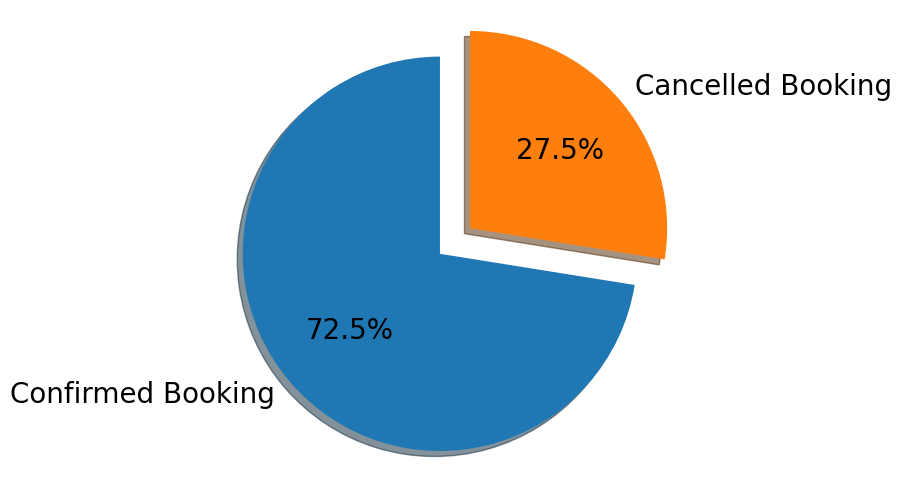

In [32]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(eda_df['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observation from above representation is:

The proportion between confirmed booking and cancelled booking is 72.5% and 27.5% respectively.

**11. Quick analysis for both the hotels for the meal and stay?**

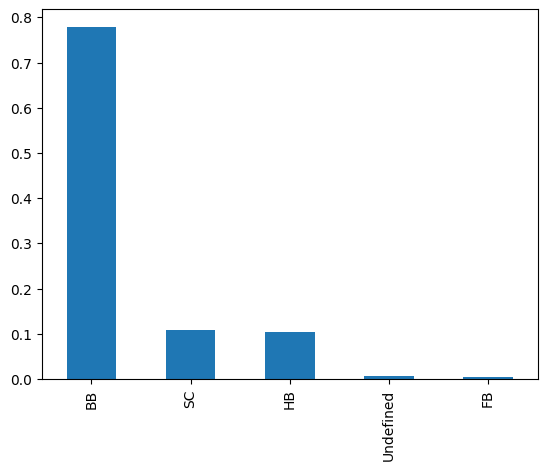

In [33]:
eda_df.meal.value_counts(normalize=True).plot.bar()
plt.show()

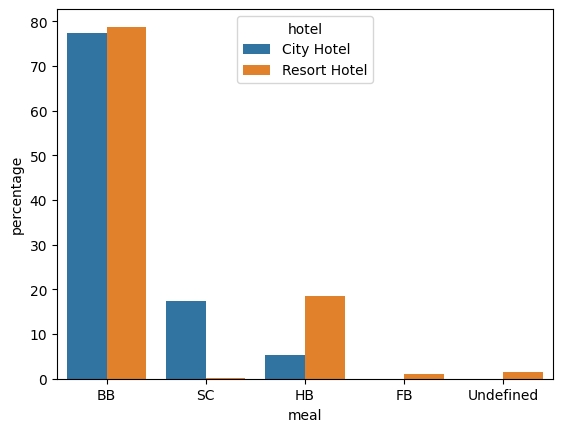

In [34]:
stay_and_meals = eda_df.groupby('hotel')['meal'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
sns.barplot(x='meal',y='percentage',data=stay_and_meals,hue='hotel')
plt.show()

Obseravtion from above representation:
1. The most preferred options is Bed and Breakfast for City hotel and resorts
2. One thing to note in SC in resortis almost non existent.While in city hotels its is second most preffered
3. From above analysis we get to know this is due to the fact that resorts are generally far from cities.




**12. Parking space in both hotels?**

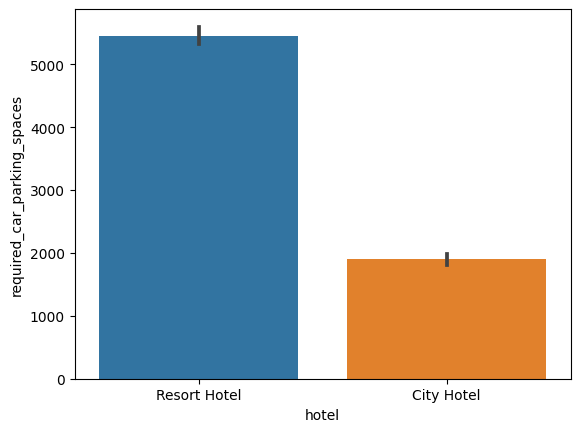

In [35]:
sns.barplot(data=eda_df,x='hotel', y='required_car_parking_spaces', estimator=sum)
plt.show()

Observation from above observation:

Car parking on resort hotels is almost 3 times as campare to city hotels.

**13. Number of bookings with the country?**

Text(0.5, 1.0, 'Booked Hotel type by country')

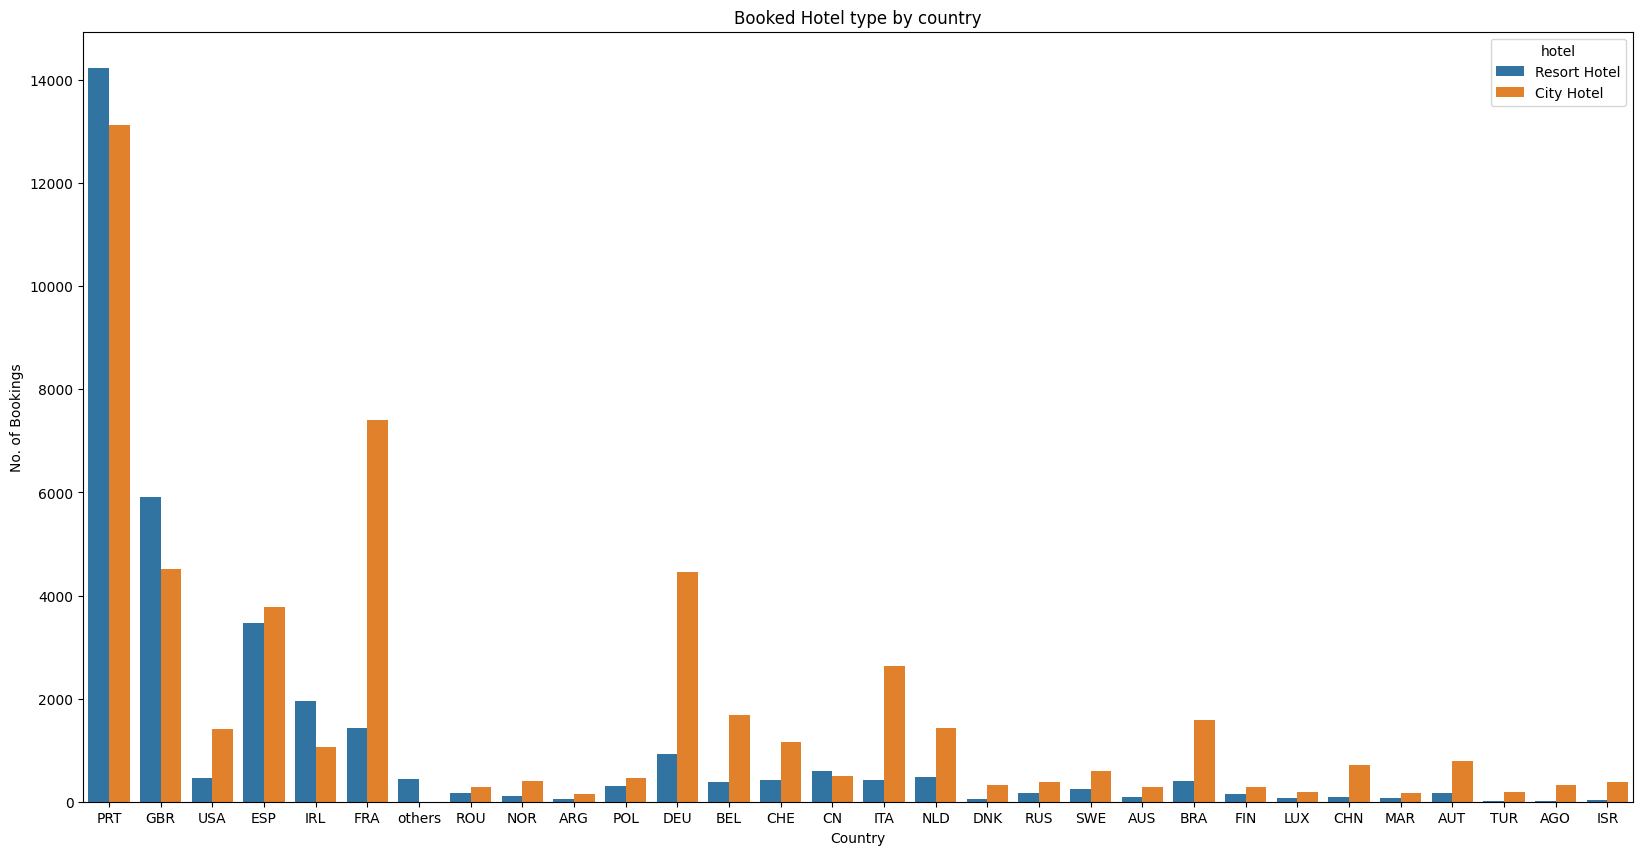

In [36]:
#COUNTRIES
eda_df['country'].unique()

#plotting of graph acording to the number of booking to the country.

d = eda_df['country'].value_counts().sort_values(ascending=False)[:30]
plt.figure(figsize=(20,10))
sns.countplot(x='country', hue='hotel', data=eda_df[eda_df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

**14. Booking of hotels according to the market segment?**

Text(0.5, 1.0, 'Bookings by market segment')

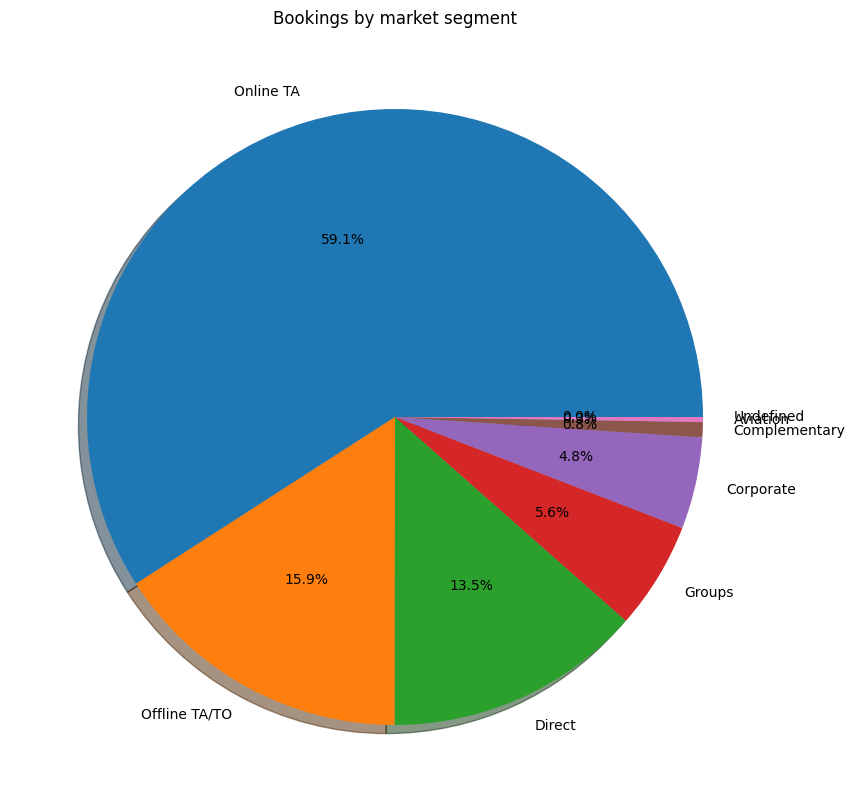

In [37]:
ACC_TO_MARKET = eda_df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(ACC_TO_MARKET, labels=ACC_TO_MARKET.index, autopct="%2.1f%%",shadow=True)
plt.title("Bookings by market segment")

Observation from above table:

The most of the booking is done by online Travel Agency (Online TA) i.e. 59.1% of total booking in the hotels followed by offline travel agency nearly about 15.9%.

Whereas least number of booking is done by the undefined or complementary booking.

**15. Preference of hotel booking by customer type?**

Text(0.5, 1.0, 'Hotel Preference by customer type')

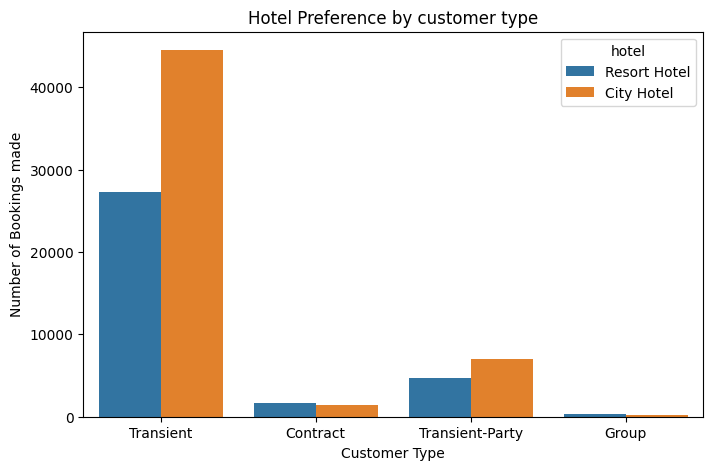

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', data=eda_df)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")

Observation from above representation:

Transient make most number of booking as campare to contract, transient-party and group.



# **Conclusion**

City hotel is more preffered by guest than resort hotel.Therefore from above represention city hotel have maximum booking.

Agent no 9 had made highest number of booking

27.5% of total boooking is cancelled.

Repeated guest are very few i.e only 3.9% .

In order to retained the guests management should take feedbacks from guests and try to imporve the services

So the moost preferred food by the customers is BB(Bed and Breakfast). HB(Half Board) and SC(Self catering) are equally preferred.

The most preffered room type by guests is TYPE A

Maximum booking is done in month of AUGUST. Where as, Minimum no of booking are in month of JANUARY

The proportion between confirmed booking and cancelled booking is 72.5% and 27.5% respectively.

The most preferred options is Bed and Breakfast for City hotel and resorts
One thing to note in SC in resortis almost non existent.While in city hotels its is second most preffered
From above analysis we get to know this is due to the fact that resorts are generally far from cities.

Car parking on resort hotels is almost 3 times as campare to city hotels.

The most of the booking is done by online Travel Agency (Online TA) i.e. 59.1% of total booking in the hotels followed by offline travel agency nearly about 15.9%.

Whereas least number of booking is done by the undefined or complementary booking.

Transient make most number of booking as campare to contract, transient-party and group


# Summary

The most important details are that city hotels are more preffered by guests than resort hotels, and that the most preferred food is BB (Bed and Breakfast), HB (Half Board) and SC (Self catering). The most preferred room type is TYPE A, and the proportion between confirmed booking and cancelled booking is 72.5% and 27.5% respectively. The most of the booking is done by online Travel Agency (Online TA), followed by offline travel agency (Offline TA). The least number of booking is done by the undefined or complementary booking. Transient make the most number of booking as campare to contract, transient-party and group.

# Links 

GitHub Links:

https://github.com/Hiteshshekhawat/Hotel-Booking-EDA